# 🧠 Transfer Learning for Image Classification
In this notebook, we explore **transfer learning** — a powerful technique in deep learning that allows us to reuse a pre-trained model to solve a new problem.

We'll demonstrate this with an example of classifying images of cats and dogs using the MobileNetV2 model.

## What is Transfer Learning?
**Transfer Learning** is a machine learning technique where a model trained on one task is repurposed on a second related task.

In deep learning, we use large neural networks pre-trained on massive datasets (like ImageNet) and fine-tune them for our specific problem.

### Analogy:
Think of it as using the foundational knowledge of a general surgeon to quickly train them to specialize in cardiology — they don’t have to start from scratch.

## How Transfer Learning Works?
1. **Load a pre-trained model** (e.g., MobileNet, ResNet) trained on a large dataset (e.g., ImageNet).
2. **Freeze** the base layers so their weights are not updated during training.
3. **Add custom layers** on top for your specific task.
4. **Train** only the top layers (or fine-tune some base layers too).

This saves training time and improves accuracy, especially with limited data.

## Why is Transfer Learning Useful?
- ✅ Avoids training from scratch
- ✅ Useful for small datasets
- ✅ Leverages powerful representations learned on large datasets
- ✅ Reduces computation time and resource usage
- ✅ Often results in better performance on tasks with fewer examples

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os
import zipfile

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.3.1
Num GPUs Available: 1


In [5]:


# Download the dataset from Microsoft (hosted by TensorFlow)
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url, extract=True)

# Get dataset path
dataset_dir = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'validation')

68608000/68606236 [==============================] - 7s 0us/step


In [ ]:
# Load data into TensorFlow datasets
IMG_SIZE = 160
BATCH_SIZE = 32

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=(IMG_SIZE, IMG_SIZE))

val_dataset = image_dataset_from_directory(val_dir,
                                           shuffle=True,
                                           batch_size=BATCH_SIZE,
                                           image_size=(IMG_SIZE, IMG_SIZE))

# Prefetch for performance
train_dataset = train_dataset.prefetch(buffer_size=32)
val_dataset = val_dataset.prefetch(buffer_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [9]:
# Load pre-trained MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

# Add custom classification layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

9412608/9406464 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [10]:
# Train the model
history = model.fit(train_dataset, epochs=5, validation_data=val_dataset)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
63/63 [==============================] - ETA: 0s - loss: 0.6497 - accuracy: 0.6405WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001952436D4C8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
63/63 [==============================] - 20s 316ms/step - loss: 0.6497 - accuracy: 0.6405 - val_loss: 0.5640 - val_accuracy: 0.7000
Epoch 2/5
63/63 [==============================] - 5s 82ms/step - loss: 0.5324 - accuracy: 0.7400 - val_loss: 0.5217 - val_accuracy: 0.7350
Epoch 3/5
63/63 [==============================] - 5s 83ms/step - loss: 0.4877 - accuracy: 0.7670 - val_loss: 0.4851 - val_accuracy: 0.7740
Epoch 4/5
63/63 [==============================] - 5s 79ms/step - loss: 0.4585 - accuracy: 0.7905 - val_loss: 0.4684 - val_accuracy: 0.7820
Epoch 5/5
63/63 [==============================] - 6s 89ms/step - loss: 0.4407 - accuracy: 0.7955 - val_loss: 0.4549 - val_accuracy: 0.79

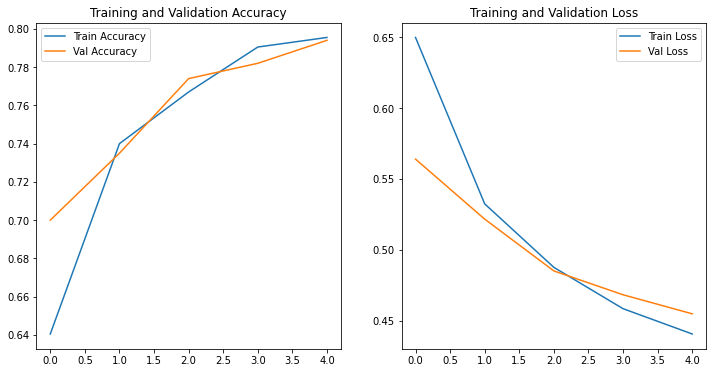

In [11]:
# Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()